<img align="right" src="img/wandering.png" />
# Wandering

A simple wandering behavior can be achieved by the combination of the previously coded exercises: 

    repeat forever
      move forward until an obstacle is detected
      turn either left or right for free space
      
Instead of starting from scratch, you will reuse the code in two Python functions, which can be called from inside the main loop.

In [30]:
import packages.initialization
import pioneer3dx as p3dx
p3dx.init()

First, you need to copy and paste the code inside the following functions:

In [31]:
def forward():
    threshold = 1
    p3dx.move(2.5,2.5)
    if min(p3dx.distance[3:5]) < threshold:
        p3dx.stop()
    

In [32]:
def turn(dirc):
    target = .05      # target angle in radians
    r = 0.1953/2          # wheel radius
    L = 0.33           # axis length
    if dirc == 0:
        initialEncoder = p3dx.rightEncoder
        robotAngle = 0
        while robotAngle < target:
            p3dx.move(1.0,-1.0)
            wheelAngle = initialEncoder - p3dx.rightEncoder
            robotAngle = 2*r*wheelAngle/L
        p3dx.stop()
    else:
        initialEncoder = p3dx.leftEncoder
        robotAngle = 0
        while robotAngle < target:
            p3dx.move(-1.0,1.0)
            wheelAngle = initialEncoder - p3dx.leftEncoder
            robotAngle = 2*r*wheelAngle/L
        p3dx.stop()

<img align="right" src="img/interrupt.png" />
Finally, you should run the main loop in the following cell.

The execution can be stopped at any time by pressing the *interrupt kernel* button.

In [33]:
try:
    while True:
        forward()
        if (min(p3dx.distance[0:3]) > min(p3dx.distance[5:])):
            while (min(p3dx.distance[3:5]) < min(p3dx.distance[5:]) or min(p3dx.distance[3:5]) < 1):
                turn(1)
                #p3dx.move(-1,1)
        else:
            while (min(p3dx.distance[3:5]) < min(p3dx.distance[0:3]) or min(p3dx.distance[3:5])< 1):
                turn(0)
                #p3dx.move(1,-1)
except KeyboardInterrupt:
    p3dx.stop()

The resulting trajectory can be plotted.

In [34]:
%matplotlib inline
import trajectory

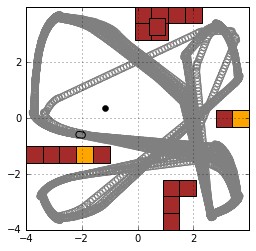

In [35]:
trajectory.plot()

Next application: [wall following](Wall%20Following.ipynb).

---
#### Try-a-Bot: an open source guide for robot programming
Developed by:
[![Robotic Intelligence Lab @ UJI](img/logo/robinlab.png "Robotic Intelligence Lab @ UJI")](http://robinlab.uji.es)

Sponsored by:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="http://www.ieee-ras.org"><img src="img/logo/ras.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.cyberbotics.com"><img src="img/logo/cyberbotics.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.theconstructsim.com"><img src="img/logo/theconstruct.png"></a>
</td>
</tr>
</table>

Follow us:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="https://www.facebook.com/RobotProgrammingNetwork"><img src="img/logo/facebook.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="https://www.youtube.com/user/robotprogrammingnet"><img src="img/logo/youtube.png"></a>
</td>
</tr>
</table>
